# Heart Disease Prediction Report

## Introduction

It's estimated that around 110 million men and 80 million women have coronary heart disease globally, and it kills nine million people each year. In this project, we will explore the predictive variables such as age, sex, cholesterol levels, etc. We will utilize the heart disease dataset from the UC Irvine Machine Learning Repository, focusing on the Cleveland database, as it is the most complete and commonly used by ML researchers. From this data, we will classify whether the patient has heart disease or not.

## Methods & Results

### Read Data
First, we load the tidyverse library and read heart disease data from the csv file. Since the data doesn't have column names, we added the column names based on the dataset documentation.

In [1]:
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
url <- "https://raw.githubusercontent.com/wtarit/dsci-100-project/main/heart_disease_dataset/processed.cleveland.data"
heart_disease <- read_csv(url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", 
                                             "slope", "ca", "thal", "num"))
heart_disease

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


We can see that the data is already in tidy format, but some of the columns don't have the correct data type, e.g (chr instead of int), so we convert it to the correct datatype. We also drop rows that contain N.A values.

In [3]:
heart_disease <- heart_disease |> 
    mutate(ca = as.integer(ca), thal = as.integer(thal)) |>
    drop_na()

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = as.integer(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


We can check the distribution of data by counting a number of rows using the num column.

In [4]:
class_distribution <- heart_disease |>
    group_by(num) |> 
    summarize(count = n())
class_distribution

num,count
<dbl>,<int>
0,160
1,54
2,35
3,35
4,13


In this table, based on the dataset documentation num represents heart disease, where 0 indicates no presence of heart disease in the patient and 1 - 4 varying degrees of the disease. The data is quite unbalanced as we see a prevelance in patients without the presence of heart disease. Since there is a small number of data to separate different type of heart disease, in this analysis, we will only focus on classifying whether the patient have the heart disease or not.  

We will combine num 1, 2, 3, and 4 into one class and since this is a classification problem where we predict the presence of heart disease in a patient, we will make the Class a factor type.

In [5]:
heart_disease_binary <- heart_disease |>
    mutate(Class = as_factor(num != 0)) |>
    select(-num)

In [6]:
heart_disease_binary

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3,3,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2,7,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,TRUE
57,1,4,130,131,0,0,115,1,1.2,2,1,7,TRUE
57,0,2,130,236,0,2,174,0,0.0,2,1,3,TRUE


We will now split 80% of our data for training and keep 20% for testing. 

In [7]:
set.seed(1234)
heart_disease_split <- initial_split(heart_disease_binary, prop = 0.8, strata = Class)  
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

### Data Visualization

We will now undergo data visualization to determine if there are any correlation of the presence of heart disease with any other features.

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.
Warning message in Ops.factor(Class):
“‘-’ not meaningful for factors”


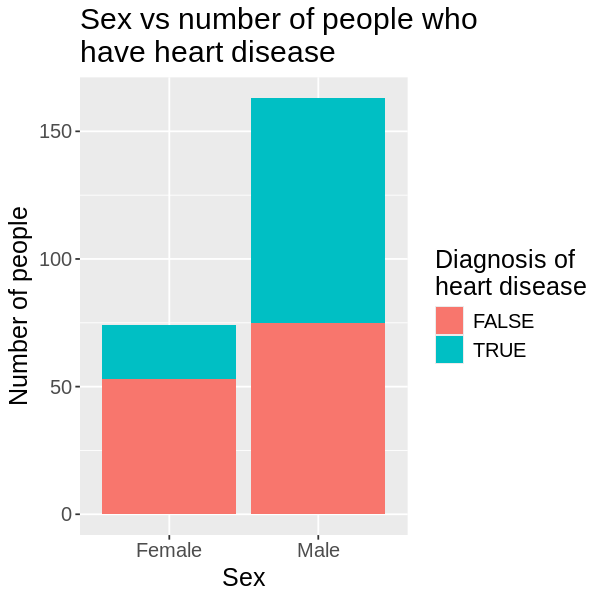

In [8]:
options(repr.plot.width = 5, repr.plot.height = 5)

heart_disease_count_sex <- heart_disease_train |>
    group_by(sex, Class) |>
    summarize(count = n()) |>
    mutate(sex = ifelse(sex == 0, "Female", "Male"))

heart_disease_count_sex_plot <- ggplot(heart_disease_count_sex, aes(x = sex, y=count, fill = Class, group = -Class)) +
    geom_bar(stat = "identity", position = "stack") +
    labs(x = "Sex", y = "Number of people", fill = "Diagnosis of \nheart disease") +
    ggtitle("Sex vs number of people who \nhave heart disease") +
    theme(text = element_text(size = 15))

heart_disease_count_sex_plot

We can see that in the dataset, we have twice the number of data recorded for males compared to females. We also notice that there's a higher chance that we diagnosed heart disease in males. Which suggest that sex have a factor for presence of heart disease in patients.

`summarise()` has grouped output by 'thal'. You can override using the
`.groups` argument.
Warning message in Ops.factor(Class):
“‘-’ not meaningful for factors”


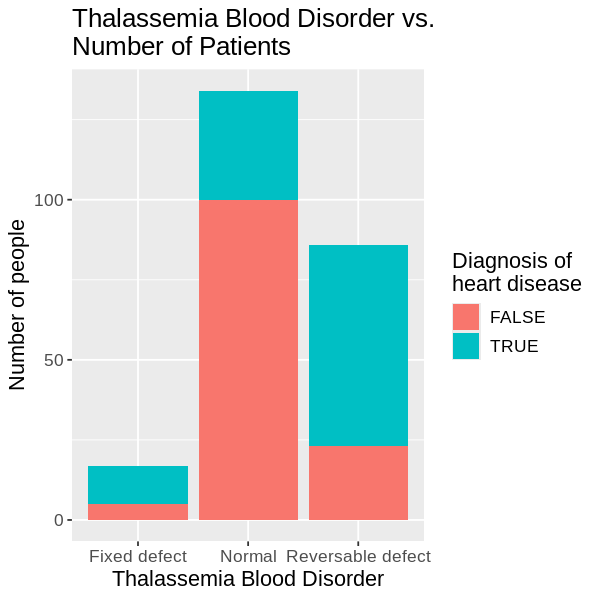

In [9]:
options(repr.plot.width = 5, repr.plot.height = 5)

heart_disease_count_thal <- heart_disease_train |>
    drop_na() |>
    group_by(thal, Class) |>
    summarize(count = n()) |>
    mutate(thal_str = case_when(thal == 3.0 ~ "Normal", 
                                                 thal == 6.0 ~ "Fixed defect",
                                                 thal == 7.0 ~ "Reversable defect"))

heart_disease_count_thal_plot <- ggplot(heart_disease_count_thal, aes(x = thal_str, y=count, fill = Class, group = -Class)) +
    geom_bar(stat = "identity", position = "stack") +
    labs(x = "Thalassemia Blood Disorder", y = "Number of people", fill = "Diagnosis of \nheart disease") +
    ggtitle("Thalassemia Blood Disorder vs. \nNumber of Patients") + #prev was vs. people who have heart disease
    theme(text = element_text(size = 13))

heart_disease_count_thal_plot

This plot shows that people with Thalassemia blood disorder, blood disorder caused when the body doesn't make enough of a protein called hemoglobin, are likely to get heart disease compared to patients that do not have the disorder.

Source : https://www.cdc.gov/ncbddd/thalassemia/index.html#:~:text=Thalassemia%20is%20an%20inherited%20

`summarise()` has grouped output by 'restecg'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Class'. You can override using the
`.groups` argument.


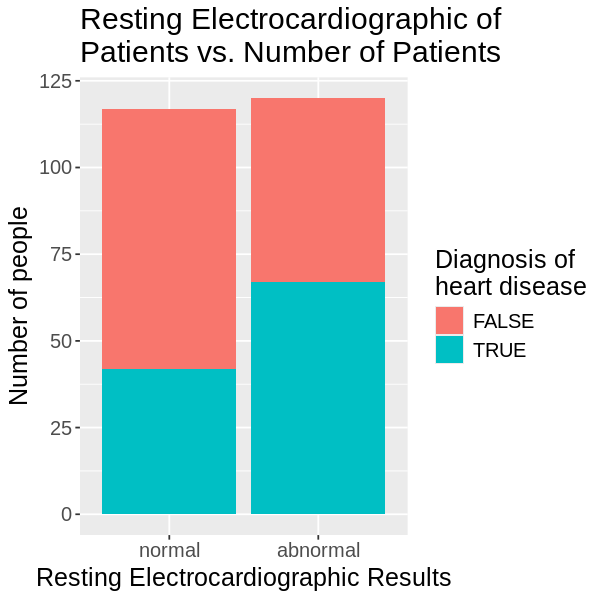

In [10]:
options(repr.plot.width = 5, repr.plot.height = 5)

heart_disease_count_restecg <- heart_disease_train |>
    drop_na() |>
    group_by(restecg, Class) |>
    summarize(count = n()) |>
    mutate(restecg = as_factor(ifelse(restecg == 0, "normal", "abnormal"))) %>%
    group_by(Class, restecg) %>%
    summarize(count = sum(count)) %>%
    ungroup()

heart_disease_count_restecg_plot <- ggplot(heart_disease_count_restecg, aes(x = restecg, y=count, fill = Class)) +
    geom_bar(stat = "identity", position = "stack") +
    labs(x = "Resting Electrocardiographic Results", y = "Number of people", fill = "Diagnosis of \nheart disease") +
    ggtitle("Resting Electrocardiographic of \nPatients vs. Number of Patients") +
    theme(text = element_text(size = 15))

heart_disease_count_restecg_plot

Here what we categorized as 'abnormal' are the integer values of 1 and 2 in restecg. Where based on the dataset documentation, integer values of 1 in restecg have ST-T wave abnormality (slight abnormality) and the integer values of 2  shosg probable or definite left ventricular hypertrophy by Estes' criteri (abnormality). While having a value of 0 in restecg means there are no abnormality detected in the patient's Resting Electrocardiographic results.

The plot above shows that people having abonormal resting  electrocardiograhic results are more likely to have a diagnosis of heart disease.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


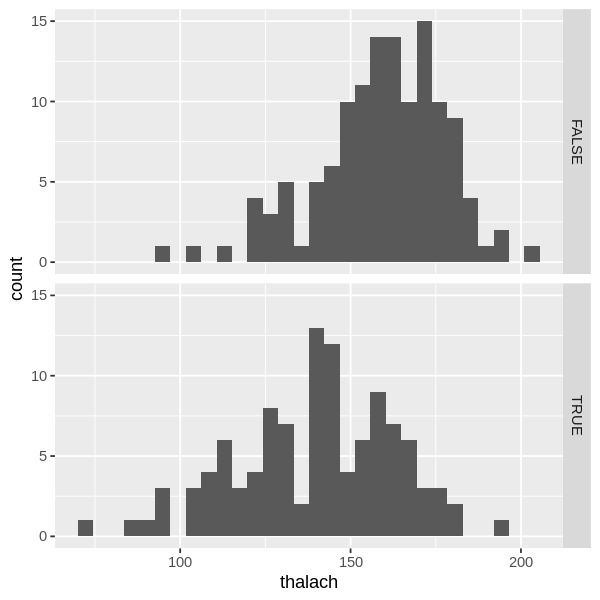

In [11]:
# thalach
# a <- filter(heart_disease_train, num == 0)
thalach_dist_1 <- ggplot(heart_disease_train, aes(x = thalach)) +
    geom_histogram() +
    facet_grid(rows = vars(Class))

thalach_dist_1

`summarise()` has grouped output by 'cp'. You can override using the `.groups`
argument.


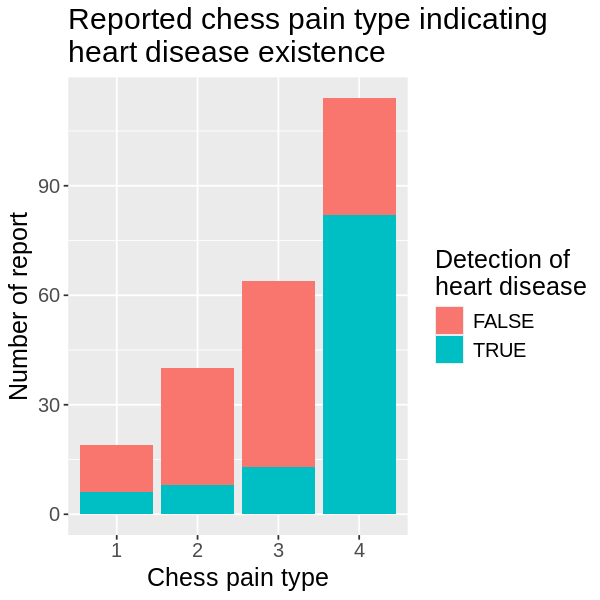

In [12]:
options(repr.plot.width = 5, repr.plot.height = 5)

heart_disease_count_cp <- heart_disease_train |>
    group_by(cp, Class) |>
    summarize(count = n()) |>
    mutate(cp = as_factor(cp))

heart_disease_count_cp_plot <- heart_disease_count_cp |>
    ggplot(aes(x = cp, y = count, fill = Class)) +
        geom_bar(stat = "identity") +
        labs(fill = "Detection of \nheart disease") +
        xlab("Chess pain type") +
        ylab("Number of report") +
        ggtitle("Reported chess pain type indicating \nheart disease existence") +
        theme(text = element_text(size = 15))

heart_disease_count_cp_plot

The plot above indicates the relationship between chess pain type and the existence of heart disease. It can be inferred that people experiencing the most severe chest pain type, type 4, show a high percentage of suffering from heart disease.

## Create a knn model

Firstly, we will find correlations between variables and trends that can help predict heart disease. We discovered that the main variables that affect heart disease are sex and Thalasemia blood disorder.

We will use these two main predictors and other related predictors to build a k-nearest neighbors (KNN) model for classification. To train a model, we will center the variables and scale them to ensure each predictor has a similar effect on the result. We will use cross-validation to select the optimal k value by focusing on accuracy and recall. We want the model to predict heart disease correctly, but we also need to make sure that people who have heart disease are classified as having heart disease.

Using 5 fold cross validation to find k

In [13]:
url <- "https://raw.githubusercontent.com/wtarit/dsci-100-project/main/heart_disease_dataset/processed.cleveland.data"
heart_disease <- read_csv(url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", 
                                             "slope", "ca", "thal", "num"))
heart_disease <- heart_disease |> 
    mutate(ca = as.integer(ca), thal = as.integer(thal)) |>
    drop_na()

heart_disease_binary <- heart_disease |>
    mutate(Class = as_factor(num > 0)) |>
    select(-num)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = as.integer(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


In [14]:
heart_disease_binary

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3,3,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2,7,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,TRUE
57,1,4,130,131,0,0,115,1,1.2,2,1,7,TRUE
57,0,2,130,236,0,2,174,0,0.0,2,1,3,TRUE


In [15]:
heart_disease_binary <- heart_disease_binary |>
    select(thal, sex, cp, thalach, restecg, Class) # 0.9
    # select(-age) #0.93
    # select()

In [16]:
set.seed(1234)
heart_disease_split <- initial_split(heart_disease_binary, prop = 0.8, strata = Class)  
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

In [17]:
heart_disease_vfold <- vfold_cv(heart_disease_train, v = 5, strata = Class)

Since we know that predictor that are most likely effecting heart disease are Sex, Chest pain type, and Thalasemia blood disorder, we create a recipe that will select those predictor and scale the predictor.

In [18]:
# heart_disease_recipe <- recipe(Class ~ thal + sex + cp, data=heart_disease_train) |>
#     step_center(all_predictors()) |>
#     step_scale(all_predictors()) 
heart_disease_recipe <- recipe(Class ~ ., data=heart_disease_train) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors()) 
heart_disease_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 5



── Operations 

• Centering for: all_predictors()

• Scaling for: all_predictors()



To find best k value we create a KNN model with neighbors set to tune.

In [19]:
heart_disease_tune <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

heart_disease_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [20]:
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by =1))

heart_disease_tune_fit <- workflow() |>
    add_recipe(heart_disease_recipe) |>
    add_model(heart_disease_tune) |>
    tune_grid(resamples = heart_disease_vfold, grid = k_vals) |>
    collect_metrics()

In [21]:
accuracies <- heart_disease_tune_fit |>
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7212265,5,0.01906655,Preprocessor1_Model01
2,accuracy,binary,0.7254818,5,0.01582614,Preprocessor1_Model02
3,accuracy,binary,0.7300108,5,0.02314561,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
18,accuracy,binary,0.7885176,5,0.01664568,Preprocessor1_Model18
19,accuracy,binary,0.7842623,5,0.01852530,Preprocessor1_Model19
20,accuracy,binary,0.7886101,5,0.01624739,Preprocessor1_Model20


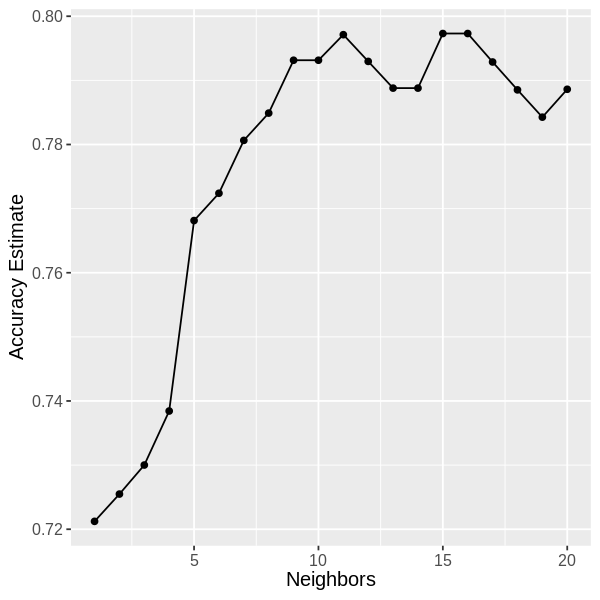

In [22]:
options(repr.plot.width = 5, repr.plot.height = 5)

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

In [23]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 15

### Build Actual model using the best K

In [24]:
heart_disease_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = 15) |>
  set_engine("kknn") |>
  set_mode("classification")

heart_disease_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 15
  weight_func = rectangular

Computational engine: kknn 


In [25]:
heart_disease_fit <- workflow() |>
    add_recipe(heart_disease_recipe) |>
    add_model(heart_disease_spec) |>
    fit(data = heart_disease_train) 

In [26]:
heart_disease_predictions <- predict(heart_disease_fit, heart_disease_test) |>
    bind_cols(heart_disease_test)

heart_disease_predictions |>
  metrics(truth = Class, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9


In [27]:
predict(heart_disease_fit, heart_disease_test)

.pred_class
<fct>
FALSE
FALSE
TRUE
⋮
TRUE
TRUE
TRUE


### NOTE
All predictors, k = 15, accuracy = 55.7  
All predictors, k = 8, accuracy = 59.0  
**No age, k = 14, accuracy = 62.2**  
No age, No restecg, k = 12, accuracy = 60.6  
No age, No thalach, k = 6, accuracy = 60.6  
sex, thal, k = 11, accuracy = 52.4  
sex, thal, cp, k = 11, accuracy = 59.0  
sex, thal, cp, restecg, k = 12, accuracy = 57.3  
sex, thal, cp, trestbps, k = 7, accuracy = 55.7  

Binary no age 93.3  
Binary sex, thal, cp 91.6

After we have the trained model, we will evaluate it with the test dataset, measuring its accuracy, precision, and recall. We will also create a confusion matrix to evaluate the prediction result for each class. 

## Discussion

##### summarize what you found (delete later)

The data analysis performed in this report has produced a tool that will be useful in terms of early detection of heart disease with a high percentage of accuracy, which is approximately 90%. The analysis was done with KNN classification to predict the existence of heart disease relying on 5 carefully selected predictors. This finding and accuracy are relatively reliable in performing a quick examination and detection of the existence of heart disease that does not involve complicated medical examination.

The model's effectiveness can significantly decrease the time and resources usually needed for heart disease diagnosis, enabling quicker and potentially earlier therapeutic actions.This is especially valuable in medical environments that are characterised by a high level of activity or limited resources.

Also, the model's success creates opportunities for further study. One immediate interest is exploring strategies to minimize heart disease risk factors. Understanding these factors could lead to preventative measures that reduce the disease's occurrence. Future studies might also incorporate broader datasets to enhance the model's accuracy and utility across different populations.

Our findings not only achieve our initial objectives but also establish a foundation for enhancing techniques to prevent and identify cardiac conditions at an early stage.This could lead to more personalized and cost-effective healthcare approaches.


## References (APA Format)

##### Data Source

Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1988). Heart Disease. *UCI Machine Learning Repository*. https://doi.org/10.24432/C52P4X.

##### Other Source

Mensah, G. A., Fuster, V., Murray, C. J. L., Roth, G. A. (2023). Global Burden of Cardiovascular Diseases and Risks, 1990-2022. *Global Burden of Diseases*. https://doi.org/10.1016/j.jacc.2023.11.007.